In [51]:
import numpy as np

### Task 1 - Binary Representations
<hr>

Rotating bits refers to shifting bits in a direction, but instead of dropping the shifted bits, appending them to the other end of the integer.
For example, 01010101 rotated by 1 to the right will become 10101010.

This is done in **rotl** using bitwise operations like >> and |.
It iterates over the last n few bits in the binary representation of the number, and adds all of them to a string.
This string is then converted back into an integer, and appended to the start of the bits.
- This is done by shifting the bits to append by the number of bits in the original number. So for example if the bits to append are 110, and the number of bits in the original number 10, 10 zeroes are added to the end of appendBits.
- Then, this is OR'd against the original number right-shifted by n, the last few bits removed to be added on.
- This creates a binary number with the rotated bits at the start, followed by the original bits minus the bits rotated from the end.

**rotr** is similar

In [ ]:
def rotl(x, n): # Rotate the bits to the left by n
    print(f"Before Rotation: 0b{x:032b}")
    s = "0b" # Keeps track of the rotated bits to be appended to the start.


    for i in range(n):
        rotatedBit = (x >> i) & 1 # Bit at the rightmost position of the number currently.
        s = s + (str)(rotatedBit) # Add that bit to the strng.

    appendBits = int(s, 2)

    # len(bin(x))-n+2 gives the length of the binary number without the prefix or the rotated bits.
    result = (appendBits << (len(bin(x))-(n+2))) | (x >> n) # [1], appending bits to the start of a binary number.

    return result

y = rotl(345436534, 3)
padding = f"After Rotation: 0b{y:032b}"
print(padding)

In [ ]:
def rotr(x, n): # Rotate the bits to the right by n
    print(f"Before Rotation: 0b{x:0b}")

    s = "0b" # Keeps track of the rotated bits to be appended to the end.

    for i in range(n):
        rotatedBit = (x >> (len(bin(x))-i)-3) & 1
        s = s + (str)(rotatedBit)
        print(rotatedBit)

    appendBits = (int)(s,2)

    result = ((x << n) | appendBits) >> n

    print(bin(result))


rotr(23235, 7)

**xANDy** is fairly simple. Where X and Y are both 1, **xANDy** has a 1. Else, a 0.
**zANDNOTx** is a little more complicated. First, x is flipped, meaning every 0 becomes a 1 and vice versa.
Then, x is AND'd with z. Together, this means that each bit at **zANDNOTx** corresponds to a 0 in x and a 1 in z. (0 from x as it would be flipped into a 1 before being AND'd.)

Finally, xANDy is OR'd with zANDNOTx. This means that at each bit in the result, it's a 1 if that bit at X and Y is a 1 OR if that bit is 0 in z and 1 in x (or vice versa). Otherwise, it's a zero.

For example: Consider x as 1010, y as 1100, and z as 1111.
- The result for xANDy will be 1000, as only the first bit has both x and y at 1.
- The result for zANDNOTx will be 0101, as both the second and fourth positions have different bits in z and x.
- ORing these two binary numbers gives us 1101, our final result for ch().

In [ ]:
def ch(x,y,z): # Choose the bits from y where x has bits set to 1, and bits in z where x has bits set to 0
    xANDy = x & y
    print(bin(xANDy))
    zANDNOTx = ~x & z # ~ is the NOT operator, meaning that x is flipped.
    print(bin(zANDNOTx))
    return xANDy | zANDNOTx

print(bin(ch(0b1010, 0b1100, 0b1111)))

maj() is fairly simple - it is done using only AND + OR. First we get the three different ANDs, x&y, x&z, y&z. 
Let's use these for the example: x=101010, y=100011, z=110001
This tells us what each variable has in common at each position. With x&y, we can see that both have 1s at the first position - so there are two "votes" for 1 already.
This gives us the following for each:
- x&y = 100010
- x&z = 100000
- y&z = 100001

Now to find out what the "winner" of the vote in each position is, we OR all three of these against each other. This is because any position in any of the above AND results means that two numbers "agree" on a 1 being at that position, so we can safely say that there is a 1 at that position.
- In this example, the result for maj(x,y,z) is 100011. At each 1 in this number, at least 2 of x,y,z "agree" on there being a 1 at that position.

In [1]:
def maj(x,y,z): # Takes a majority vote of the bits in x,y,z. Output should have 1 in the position where at least two of x,y,z have 1.

    # Simply AND the bits in each combination of x,y,z.
    xANDy = x & y
    print(bin(xANDy))
    xANDz = x & z
    print(bin(xANDz))
    yANDz = y & z
    print(bin(yANDz))

    return xANDy | xANDz | yANDz # OR them all together to get the final result

print(bin(maj(0b101010, 0b100011, 0b110001)))

0b100010
0b100000
0b100001
0b100011


### Task 2 - Hash Functions
<hr>

Python version of the hash(char *s) function from *The C Programming Language*. 
Takes in a string, and returns a number (the hash of that string).
Starts out by creating a hashval starting at 0, then iterates over every character in that string.
Sets the hashval to the ASCII value of the character, plus 31 times the current value of hashval
Finally, returns the value of hashval mod 101. This is the hash value of the string.

Using "hello" as an example...
- h -> 104. As hashval starts at zero, nothing is added to it.
- e -> 101. Hashval now equals 101 + 31 * 104. (3325)
- l -> 108. Hashval now equals 108 + 31 * 3325. (103183)
- l -> 108. Hashval now equals 108 + 31 * 103183. (3198781)
- o -> 111. Hashval now equals 111 + 31 * 3198781. (99162322)
- The final value of hashval is then mod'd against 101, resulting in 99162322 mod 101, aka 17, our final result.


The numbers 31 and 101 were not chosen for any particularly known reason - they were just what worked best at creating the hash value. They are both relatively low prime numbers, so they're easy to remember as constants and 

In [ ]:
def hash(s):
    hashval = 0
    for i in range(len(s)):
        hashval = ord(s[i]) + 31 * hashval # [2] - ord() gets the ASCII value of a given character.
    return hashval%101

print(hash("hello"))

### Task 3 - SHA256
<hr>

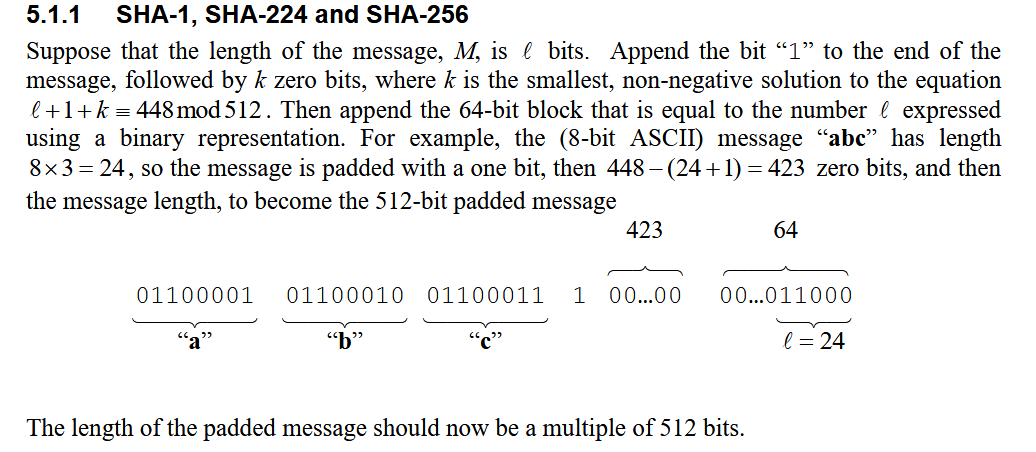

File could be bigger than 512 bits. Only print the last block & add the padding to it, going into another block if necessary.

First, I will do some operations to split my file into 512 bit sized chunks, by encoding it and counting the number of bits. I encode it in utf-8 to make sure I have a consistent idea of how many bytes each character makes up, making it reliable to calculate how many bits are in a file.

I also save the whole message in binary, and the amount of bits in the mesasge, for later use. The bit of code  `'{:>0512b}'.format(int.from_bytes(str)` just converts a string into it's binary representation. This includes any leading zeroes, which are necessary for getting an accurate number of bits and ensuring that every block is 512 bits long.

In [35]:
f = open("sha256.txt", "r", encoding='utf-8') # [3] - open the file with an encoding method.

file = f.read().encode('utf-8')

# Use a list comprehension to split the bytes into chunks with a size of 64 (64 bytes = 512 bits)
whole_message_bits = '{:>0512b}'.format(int.from_bytes(file)) # Convert the bytes to an integer, then to binary.
message_length = len(whole_message_bits)
blocks = ['{:>0512b}'.format(int.from_bytes(file[i:i+64])) for i in range(0, len(file), 64)] # [4] - List comprehension for splitting an array into chunks

print(file[-44:])

print("Blocks: ")
print("Bit Length: ",message_length)
print("Whole Message: ", whole_message_bits)

b'ue quis massa id, ullamcorper posuere urna. '
Blocks: 
Bit Length:  21343
Whole Message:  10011000110111101110010011001010110110100100000011010010111000001110011011101010110110100100000011001000110111101101100011011110111001000100000011100110110100101110100001000000110000101101101011001010111010000101100001000000110001101101111011011100111001101100101011000110111010001100101011101000111010101110010001000000110000101100100011010010111000001101001011100110110001101101001011011100110011100100000011001010110110001101001011101000010111000100000010011100111010101101110011000110010000001100010011011000110000101101110011001000110100101110100001000000110010101101100011010010111010000100000011001010110110001100101011010010110011001100101011011100110010000100000011011000110000101100011011010010110111001101001011000010010000001101100011000010110111101110010011001010110010101110100001011100010000001001110011101010110111001100011001000000110111001100101011000110010000001101100011010010110011101110

Now, I can start appending bits to the end of the last block.

In [ ]:
print(blocks[-1])
print(bin(int(blocks[-1])))
x = message_length % 512
message_remainder = (512-(message_length % 512))-1
print(message_remainder)
# TOOD Track number of leading zeroes

00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111010101100101001000000111000101110101011010010111001100100000011011010110000101110011011100110110000100100000011010010110010000101100001000000111010101101100011011000110000101101101011000110110111101110010011100000110010101110010001000000111000001101111011100110111010101100101011100100110010100100000011101010111001001101110011000010010111000100000
0b11100010110101101100000100111111101111001100110011000000111110100010101111000010101010101010011110011110000110011011110011100101100111011011011101101001010000001110011100101011101100010010010001000100111111101101111101011110101100010110000111010101110110001101111010011111011101110011000100000000011111001011100000001110001000000110111001100000000110001100110010100111001010000011010011011001010001100010101010010010110111000111101000001000000011110011111001000011010101101100010000100

### Task 4 - Prime Numbers
<hr>

In [52]:
def isPrime(x): # Brute Force
    for i in range((int)(np.sqrt(x))):
        if x % (i+1) == 0 and (i+1) != 1:
            return False
    return True

def runPrime():
    for i in range(100): #ipython magic number
        if isPrime(i+1):
            print(i+1)

%timeit runPrime()


1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61

### Task 5 - Roots
<hr>

### Task 6 - Proof of Work
<hr>

### Task 7 - Turing Machines
<hr>

### Task 8 - Computational Complexity
<hr>

References
- [1] Appending bits to the start of a binary number: https://stackoverflow.com/a/51678298
- [2] ord() in Python: https://docs.python.org/3.4/library/functions.html?highlight=ord#ord
- [3] Open file with encoding: https://stackoverflow.com/a/49375134
- [4] Splitting an array into even-sized chunks: https://www.geeksforgeeks.org/break-list-chunks-size-n-python/
